# 基于卷积神经网络的手写英文字母识别系统研究

In [1]:
from myCnn.cnnWithAttention.utils import *
from myCnn.cnnWithAttention.attentionStructure import *
from myCnn.cnnWithAttention.train_my_cnn import *
import matplotlib.pyplot as plt

## 基本参数设置

In [2]:
ROOT_DIR = "emnist_png_balanced"  # 数据集路径
BATCH_SIZE = 256  # 批大小
EPOCH = 500  # 训练轮数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# 设备选择
LR = 1e-4  # 学习率

### 加入数据增强

训练集每个类别样本数：
类别 A: 1400
类别 B: 1400
类别 C: 1400
类别 D: 1400
类别 E: 1400
类别 F: 1400
类别 G: 1400
类别 H: 1400
类别 I: 1400
类别 J: 1400
类别 K: 1400
类别 L: 1400
类别 M: 1400
类别 N: 1400
类别 O: 1400
类别 P: 1400
类别 Q: 1400
类别 R: 1400
类别 S: 1400
类别 T: 1400
类别 U: 1400
类别 V: 1400
类别 W: 1400
类别 X: 1400
类别 Y: 1400
类别 Z: 1400
类别 a_: 1400
类别 b_: 1400
类别 d_: 1400
类别 e_: 1400
类别 f_: 1400
类别 g_: 1400
类别 h_: 1400
类别 n_: 1400
类别 q_: 1400
类别 r_: 1400
类别 t_: 1400

验证集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 Q: 300
类别 R: 300
类别 S: 300
类别 T: 300
类别 U: 300
类别 V: 300
类别 W: 300
类别 X: 300
类别 Y: 300
类别 Z: 300
类别 a_: 300
类别 b_: 300
类别 d_: 300
类别 e_: 300
类别 f_: 300
类别 g_: 300
类别 h_: 300
类别 n_: 300
类别 q_: 300
类别 r_: 300
类别 t_: 300

测试集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 

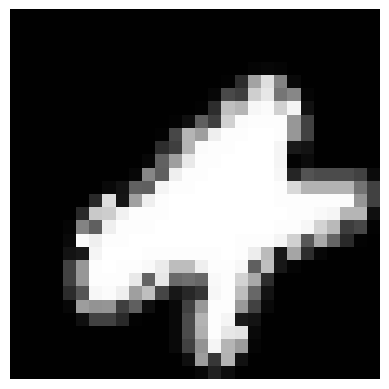

In [3]:
transform = AlbumentationsTransform()  # 使用数据增强

train_loader, val_loader, test_loader, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

CNNWithAttention(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (MaxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

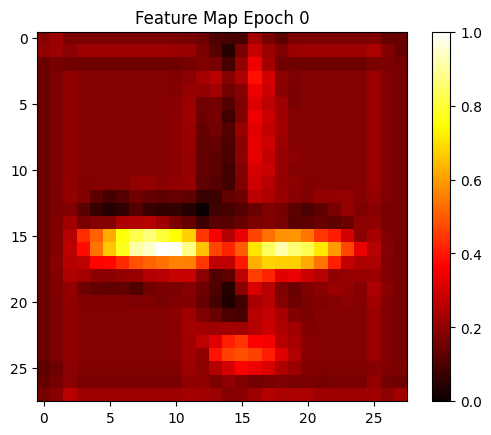

Epoch [1/500] Loss: 3.4793, Train Top-1 Acc: 0.0744, Train Top-3 Acc: 0.1865, Val Top-1 Acc: 0.1364, Val Top-3 Acc: 0.3673
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.1364
Epoch [2/500] Loss: 3.0850, Train Top-1 Acc: 0.1630, Train Top-3 Acc: 0.3823, Val Top-1 Acc: 0.2396, Val Top-3 Acc: 0.5382
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2396
Epoch [3/500] Loss: 2.6838, Train Top-1 Acc: 0.2596, Train Top-3 Acc: 0.5454, Val Top-1 Acc: 0.3527, Val Top-3 Acc: 0.6286
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.3527
Epoch [4/500] Loss: 2.3093, Train Top-1 Acc: 0.3917, Train Top-3 Acc: 0.6998, Val Top-1 Acc: 0.5649, Val Top-3 Acc: 0.8350
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.5649
Epoch [5/500] Loss: 1.9332, Train Top-1 Acc: 0.5338, Train Top-3 Acc: 0.8119, Val Top-1 Acc: 0.6796, Val Top-3 Acc: 0.8920
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.6796
Epoch [6/500] Loss: 1.5668, Train Top-1 Acc: 0.6520, Train Top-3 Acc: 0.8815, Val Top-1 Acc: 0.7267, Val Top-3 Acc: 0.9137
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7267
Epoch [7/500] Loss: 1.2426, Train Top-1 Acc: 0.7348, Train

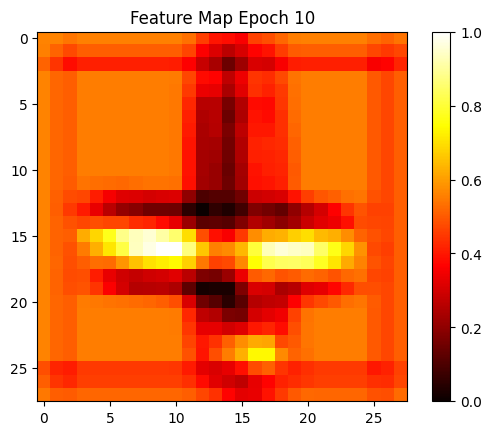

Epoch [11/500] Loss: 0.6917, Train Top-1 Acc: 0.8275, Train Top-3 Acc: 0.9591, Val Top-1 Acc: 0.8450, Val Top-3 Acc: 0.9614
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8450
Epoch [12/500] Loss: 0.6333, Train Top-1 Acc: 0.8365, Train Top-3 Acc: 0.9632, Val Top-1 Acc: 0.8426, Val Top-3 Acc: 0.9622
Epoch [13/500] Loss: 0.5917, Train Top-1 Acc: 0.8438, Train Top-3 Acc: 0.9659, Val Top-1 Acc: 0.8460, Val Top-3 Acc: 0.9645
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8460
Epoch [14/500] Loss: 0.5549, Train Top-1 Acc: 0.8484, Train Top-3 Acc: 0.9674, Val Top-1 Acc: 0.8641, Val Top-3 Acc: 0.9706
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8641
Epoch [15/500] Loss: 0.5285, Train Top-1 Acc: 0.8535, Train Top-3 Acc: 0.9697, Val Top-1 Acc: 0.8584, Val Top-3 Acc: 0.9694
Epoch [16/500] Loss: 0.5064, Train Top-1 Acc: 0.8573, Train Top-3 Acc: 0.9705, Val Top-1 Acc: 0.8240, Val Top-3 Acc: 0.9578
Epoch [17/500] Loss: 0.4878, Train Top-1 Acc: 0.8605, Train Top-3 Acc: 0.9728, Val Top-1 Acc: 0.8657, Val Top-3 Acc: 0.9755
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8

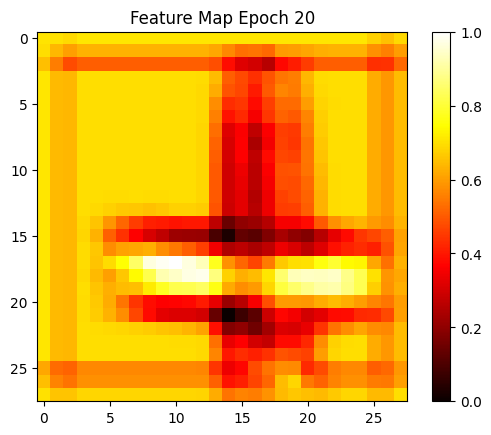

Epoch [21/500] Loss: 0.4276, Train Top-1 Acc: 0.8720, Train Top-3 Acc: 0.9775, Val Top-1 Acc: 0.8749, Val Top-3 Acc: 0.9766
Epoch [22/500] Loss: 0.4204, Train Top-1 Acc: 0.8737, Train Top-3 Acc: 0.9768, Val Top-1 Acc: 0.8768, Val Top-3 Acc: 0.9776
Epoch [23/500] Loss: 0.4085, Train Top-1 Acc: 0.8769, Train Top-3 Acc: 0.9778, Val Top-1 Acc: 0.8623, Val Top-3 Acc: 0.9719
Epoch [24/500] Loss: 0.4024, Train Top-1 Acc: 0.8781, Train Top-3 Acc: 0.9788, Val Top-1 Acc: 0.8744, Val Top-3 Acc: 0.9786
Epoch [25/500] Loss: 0.3909, Train Top-1 Acc: 0.8793, Train Top-3 Acc: 0.9796, Val Top-1 Acc: 0.8773, Val Top-3 Acc: 0.9770
Epoch [26/500] Loss: 0.3897, Train Top-1 Acc: 0.8798, Train Top-3 Acc: 0.9788, Val Top-1 Acc: 0.8880, Val Top-3 Acc: 0.9779
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8880
Epoch [27/500] Loss: 0.3815, Train Top-1 Acc: 0.8827, Train Top-3 Acc: 0.9796, Val Top-1 Acc: 0.8712, Val Top-3 Acc: 0.9767
Epoch [28/500] Loss: 0.3761, Train Top-1 Acc: 0.8831, Train Top-3 Acc: 0.9811, Val Top-1 Acc: 0.89

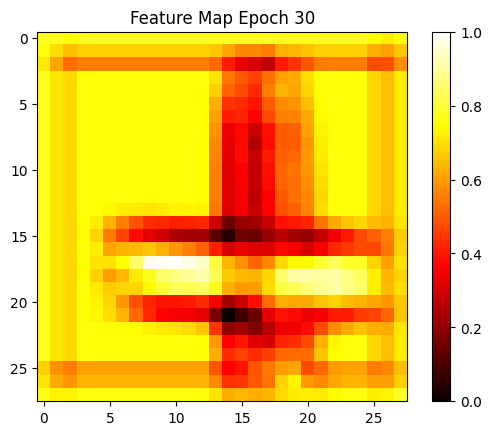

Epoch [31/500] Loss: 0.3584, Train Top-1 Acc: 0.8873, Train Top-3 Acc: 0.9817, Val Top-1 Acc: 0.8852, Val Top-3 Acc: 0.9797
Epoch [32/500] Loss: 0.3555, Train Top-1 Acc: 0.8877, Train Top-3 Acc: 0.9821, Val Top-1 Acc: 0.8923, Val Top-3 Acc: 0.9811
Epoch [33/500] Loss: 0.3540, Train Top-1 Acc: 0.8894, Train Top-3 Acc: 0.9823, Val Top-1 Acc: 0.8862, Val Top-3 Acc: 0.9782
Epoch [34/500] Loss: 0.3507, Train Top-1 Acc: 0.8883, Train Top-3 Acc: 0.9826, Val Top-1 Acc: 0.8925, Val Top-3 Acc: 0.9823
Epoch [35/500] Loss: 0.3432, Train Top-1 Acc: 0.8918, Train Top-3 Acc: 0.9833, Val Top-1 Acc: 0.8895, Val Top-3 Acc: 0.9797
Epoch [36/500] Loss: 0.3432, Train Top-1 Acc: 0.8912, Train Top-3 Acc: 0.9831, Val Top-1 Acc: 0.8850, Val Top-3 Acc: 0.9807
Epoch [37/500] Loss: 0.3352, Train Top-1 Acc: 0.8931, Train Top-3 Acc: 0.9836, Val Top-1 Acc: 0.8970, Val Top-3 Acc: 0.9818
Epoch [38/500] Loss: 0.3395, Train Top-1 Acc: 0.8923, Train Top-3 Acc: 0.9828, Val Top-1 Acc: 0.8890, Val Top-3 Acc: 0.9811
Epoch [3

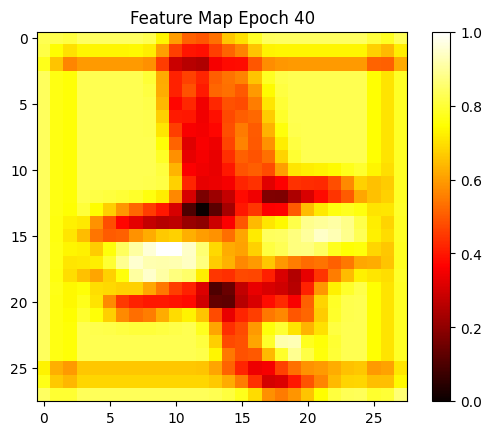

Epoch [41/500] Loss: 0.3284, Train Top-1 Acc: 0.8958, Train Top-3 Acc: 0.9836, Val Top-1 Acc: 0.8984, Val Top-3 Acc: 0.9840
Epoch [42/500] Loss: 0.3269, Train Top-1 Acc: 0.8942, Train Top-3 Acc: 0.9847, Val Top-1 Acc: 0.9014, Val Top-3 Acc: 0.9833
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9014
Epoch [43/500] Loss: 0.3255, Train Top-1 Acc: 0.8959, Train Top-3 Acc: 0.9847, Val Top-1 Acc: 0.8967, Val Top-3 Acc: 0.9836
Epoch [44/500] Loss: 0.3210, Train Top-1 Acc: 0.8967, Train Top-3 Acc: 0.9852, Val Top-1 Acc: 0.8987, Val Top-3 Acc: 0.9833
Epoch [45/500] Loss: 0.3189, Train Top-1 Acc: 0.8965, Train Top-3 Acc: 0.9852, Val Top-1 Acc: 0.8998, Val Top-3 Acc: 0.9828
Epoch [46/500] Loss: 0.3173, Train Top-1 Acc: 0.8981, Train Top-3 Acc: 0.9847, Val Top-1 Acc: 0.8925, Val Top-3 Acc: 0.9833
Epoch [47/500] Loss: 0.3165, Train Top-1 Acc: 0.8974, Train Top-3 Acc: 0.9858, Val Top-1 Acc: 0.8982, Val Top-3 Acc: 0.9834
Epoch [48/500] Loss: 0.3123, Train Top-1 Acc: 0.8985, Train Top-3 Acc: 0.9851, Val Top-1 Acc: 0.90

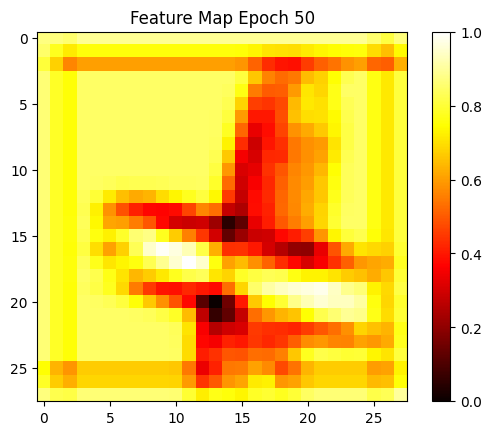

Epoch [51/500] Loss: 0.3067, Train Top-1 Acc: 0.9005, Train Top-3 Acc: 0.9866, Val Top-1 Acc: 0.8964, Val Top-3 Acc: 0.9830
Epoch [52/500] Loss: 0.3026, Train Top-1 Acc: 0.9016, Train Top-3 Acc: 0.9859, Val Top-1 Acc: 0.8924, Val Top-3 Acc: 0.9828
Epoch [53/500] Loss: 0.3018, Train Top-1 Acc: 0.9018, Train Top-3 Acc: 0.9862, Val Top-1 Acc: 0.8920, Val Top-3 Acc: 0.9795
Epoch [54/500] Loss: 0.3000, Train Top-1 Acc: 0.9023, Train Top-3 Acc: 0.9863, Val Top-1 Acc: 0.8991, Val Top-3 Acc: 0.9839
Epoch [55/500] Loss: 0.2990, Train Top-1 Acc: 0.9012, Train Top-3 Acc: 0.9873, Val Top-1 Acc: 0.9002, Val Top-3 Acc: 0.9839
Epoch [56/500] Loss: 0.3003, Train Top-1 Acc: 0.9017, Train Top-3 Acc: 0.9865, Val Top-1 Acc: 0.9042, Val Top-3 Acc: 0.9854
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9042
Epoch [57/500] Loss: 0.2985, Train Top-1 Acc: 0.9040, Train Top-3 Acc: 0.9871, Val Top-1 Acc: 0.9038, Val Top-3 Acc: 0.9865
Epoch [58/500] Loss: 0.2944, Train Top-1 Acc: 0.9037, Train Top-3 Acc: 0.9869, Val Top-1 Acc: 0.89

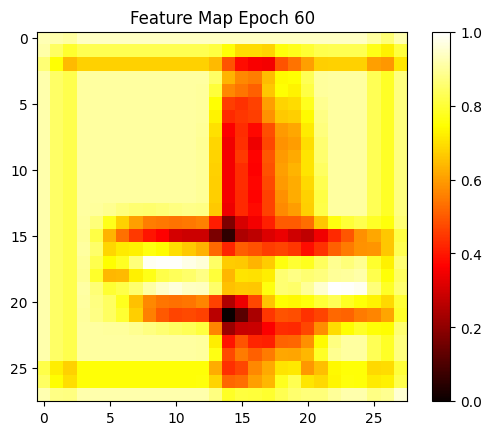

Epoch [61/500] Loss: 0.2900, Train Top-1 Acc: 0.9043, Train Top-3 Acc: 0.9871, Val Top-1 Acc: 0.8982, Val Top-3 Acc: 0.9848
Epoch [62/500] Loss: 0.2878, Train Top-1 Acc: 0.9053, Train Top-3 Acc: 0.9877, Val Top-1 Acc: 0.9059, Val Top-3 Acc: 0.9864
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9059
Epoch [63/500] Loss: 0.2902, Train Top-1 Acc: 0.9050, Train Top-3 Acc: 0.9873, Val Top-1 Acc: 0.8959, Val Top-3 Acc: 0.9840
Epoch [64/500] Loss: 0.2865, Train Top-1 Acc: 0.9057, Train Top-3 Acc: 0.9875, Val Top-1 Acc: 0.9090, Val Top-3 Acc: 0.9871
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9090
Epoch [65/500] Loss: 0.2866, Train Top-1 Acc: 0.9058, Train Top-3 Acc: 0.9879, Val Top-1 Acc: 0.8965, Val Top-3 Acc: 0.9841
Epoch [66/500] Loss: 0.2867, Train Top-1 Acc: 0.9059, Train Top-3 Acc: 0.9875, Val Top-1 Acc: 0.9005, Val Top-3 Acc: 0.9844
Epoch [67/500] Loss: 0.2833, Train Top-1 Acc: 0.9061, Train Top-3 Acc: 0.9881, Val Top-1 Acc: 0.8984, Val Top-3 Acc: 0.9830
Epoch [68/500] Loss: 0.2808, Train Top-1 Acc: 0.9072, Train Top-

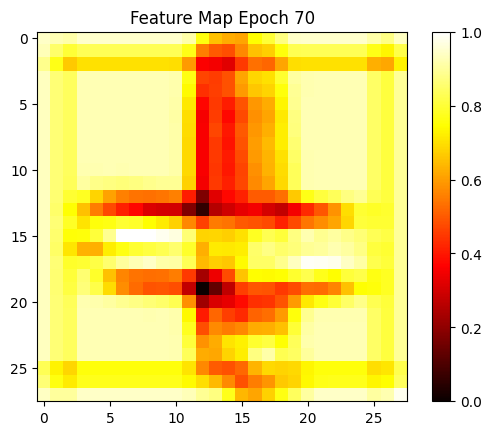

Epoch [71/500] Loss: 0.2780, Train Top-1 Acc: 0.9082, Train Top-3 Acc: 0.9887, Val Top-1 Acc: 0.9064, Val Top-3 Acc: 0.9863
Epoch [72/500] Loss: 0.2760, Train Top-1 Acc: 0.9094, Train Top-3 Acc: 0.9887, Val Top-1 Acc: 0.9047, Val Top-3 Acc: 0.9855
Epoch [73/500] Loss: 0.2746, Train Top-1 Acc: 0.9086, Train Top-3 Acc: 0.9887, Val Top-1 Acc: 0.9083, Val Top-3 Acc: 0.9866
Epoch [74/500] Loss: 0.2730, Train Top-1 Acc: 0.9110, Train Top-3 Acc: 0.9888, Val Top-1 Acc: 0.9050, Val Top-3 Acc: 0.9872
Epoch [75/500] Loss: 0.2744, Train Top-1 Acc: 0.9094, Train Top-3 Acc: 0.9887, Val Top-1 Acc: 0.9027, Val Top-3 Acc: 0.9844
Epoch [76/500] Loss: 0.2696, Train Top-1 Acc: 0.9097, Train Top-3 Acc: 0.9891, Val Top-1 Acc: 0.9092, Val Top-3 Acc: 0.9868
Epoch [77/500] Loss: 0.2683, Train Top-1 Acc: 0.9106, Train Top-3 Acc: 0.9893, Val Top-1 Acc: 0.9111, Val Top-3 Acc: 0.9862
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9111
Epoch [78/500] Loss: 0.2695, Train Top-1 Acc: 0.9108, Train Top-3 Acc: 0.9894, Val Top-1 Acc: 0.88

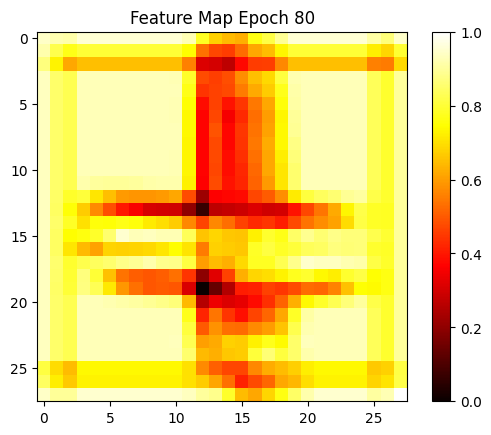

Epoch [81/500] Loss: 0.2700, Train Top-1 Acc: 0.9101, Train Top-3 Acc: 0.9897, Val Top-1 Acc: 0.9023, Val Top-3 Acc: 0.9851
Epoch [82/500] Loss: 0.2648, Train Top-1 Acc: 0.9111, Train Top-3 Acc: 0.9895, Val Top-1 Acc: 0.9069, Val Top-3 Acc: 0.9861
Epoch [83/500] Loss: 0.2651, Train Top-1 Acc: 0.9118, Train Top-3 Acc: 0.9897, Val Top-1 Acc: 0.9086, Val Top-3 Acc: 0.9880
Epoch [84/500] Loss: 0.2628, Train Top-1 Acc: 0.9128, Train Top-3 Acc: 0.9896, Val Top-1 Acc: 0.9050, Val Top-3 Acc: 0.9873
Epoch [85/500] Loss: 0.2672, Train Top-1 Acc: 0.9114, Train Top-3 Acc: 0.9897, Val Top-1 Acc: 0.9075, Val Top-3 Acc: 0.9871
Epoch [86/500] Loss: 0.2620, Train Top-1 Acc: 0.9116, Train Top-3 Acc: 0.9898, Val Top-1 Acc: 0.9137, Val Top-3 Acc: 0.9875
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9137
Epoch [87/500] Loss: 0.2617, Train Top-1 Acc: 0.9125, Train Top-3 Acc: 0.9900, Val Top-1 Acc: 0.9095, Val Top-3 Acc: 0.9870
Epoch [88/500] Loss: 0.2601, Train Top-1 Acc: 0.9128, Train Top-3 Acc: 0.9902, Val Top-1 Acc: 0.91

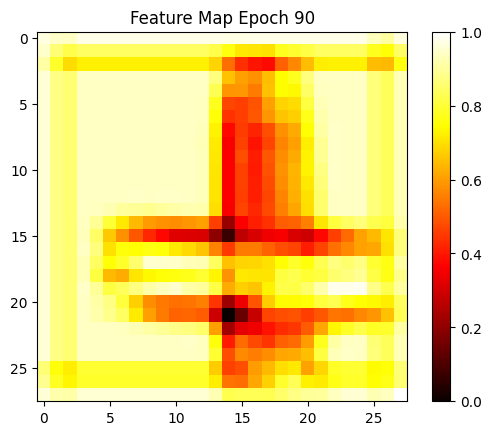

Epoch [91/500] Loss: 0.2580, Train Top-1 Acc: 0.9135, Train Top-3 Acc: 0.9900, Val Top-1 Acc: 0.9064, Val Top-3 Acc: 0.9881
Epoch [92/500] Loss: 0.2552, Train Top-1 Acc: 0.9134, Train Top-3 Acc: 0.9906, Val Top-1 Acc: 0.9005, Val Top-3 Acc: 0.9865
Epoch [93/500] Loss: 0.2564, Train Top-1 Acc: 0.9144, Train Top-3 Acc: 0.9905, Val Top-1 Acc: 0.9040, Val Top-3 Acc: 0.9870
Epoch [94/500] Loss: 0.2537, Train Top-1 Acc: 0.9143, Train Top-3 Acc: 0.9904, Val Top-1 Acc: 0.9031, Val Top-3 Acc: 0.9868
Epoch [95/500] Loss: 0.2570, Train Top-1 Acc: 0.9142, Train Top-3 Acc: 0.9904, Val Top-1 Acc: 0.9106, Val Top-3 Acc: 0.9884
Epoch [96/500] Loss: 0.2552, Train Top-1 Acc: 0.9127, Train Top-3 Acc: 0.9908, Val Top-1 Acc: 0.9041, Val Top-3 Acc: 0.9850
Epoch [97/500] Loss: 0.2516, Train Top-1 Acc: 0.9154, Train Top-3 Acc: 0.9906, Val Top-1 Acc: 0.9055, Val Top-3 Acc: 0.9867
Epoch [98/500] Loss: 0.2500, Train Top-1 Acc: 0.9158, Train Top-3 Acc: 0.9907, Val Top-1 Acc: 0.9047, Val Top-3 Acc: 0.9868
Epoch [9

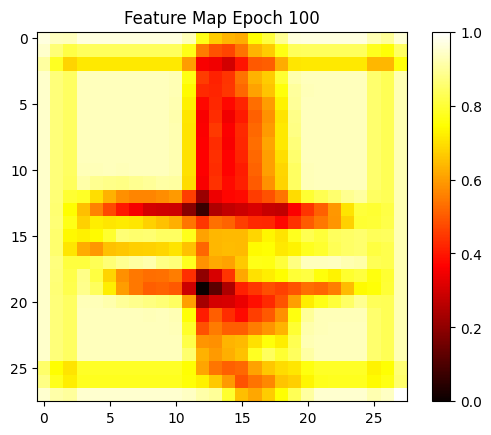

Epoch [101/500] Loss: 0.2508, Train Top-1 Acc: 0.9167, Train Top-3 Acc: 0.9905, Val Top-1 Acc: 0.9090, Val Top-3 Acc: 0.9894
⏳ 验证集Top-1准确率在连续 15 轮未提升，训练提前终止。
训练结束。


In [4]:
model = CNNWithAttention(label_num, use_attention=True) # 调用模型
print(model)
train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_aug_best.pth",
)

print("训练结束。")

### 训练模型（无注意力机制）

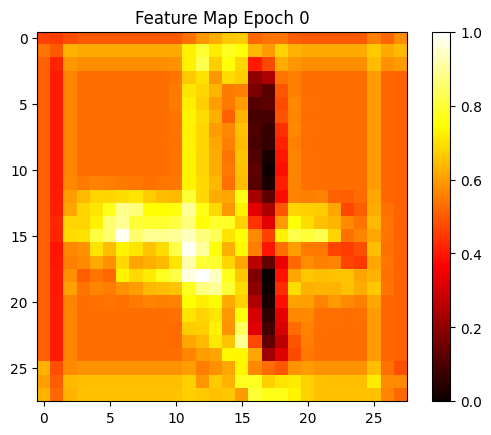

Epoch [1/500] Loss: 3.4231, Train Top-1 Acc: 0.0911, Train Top-3 Acc: 0.2156, Val Top-1 Acc: 0.2131, Val Top-3 Acc: 0.4484
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2131
Epoch [2/500] Loss: 2.9756, Train Top-1 Acc: 0.1935, Train Top-3 Acc: 0.4324, Val Top-1 Acc: 0.2455, Val Top-3 Acc: 0.5312
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2455
Epoch [3/500] Loss: 2.6217, Train Top-1 Acc: 0.2914, Train Top-3 Acc: 0.5767, Val Top-1 Acc: 0.4385, Val Top-3 Acc: 0.7457
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.4385
Epoch [4/500] Loss: 2.3100, Train Top-1 Acc: 0.3924, Train Top-3 Acc: 0.6886, Val Top-1 Acc: 0.5429, Val Top-3 Acc: 0.8252
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.5429
Epoch [5/500] Loss: 2.0311, Train Top-1 Acc: 0.4751, Train Top-3 Acc: 0.7642, Val Top-1 Acc: 0.5465, Val Top-3 Acc: 0.7995
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.5465
Epoch [6/500] Loss: 1.7926, Train Top-1 Acc: 0.5382, Train Top-3 Acc: 0.8156, Val Top-1 Acc: 0.6586, Val Top-3 Acc: 0.8919
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.6586
Epoch [7/500] Loss: 1.6004, Train Top-1 Acc: 0.5846, Train

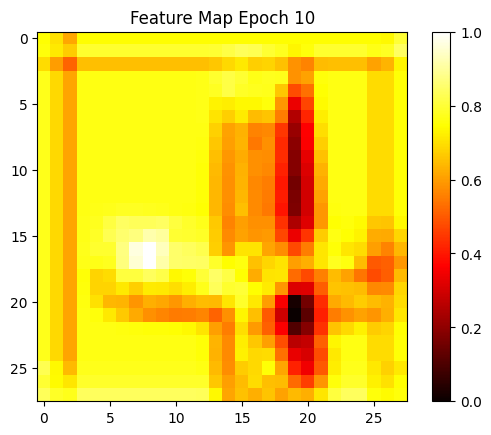

Epoch [11/500] Loss: 1.1187, Train Top-1 Acc: 0.6886, Train Top-3 Acc: 0.9040, Val Top-1 Acc: 0.7950, Val Top-3 Acc: 0.9495
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7950
Epoch [12/500] Loss: 1.0481, Train Top-1 Acc: 0.7028, Train Top-3 Acc: 0.9113, Val Top-1 Acc: 0.7834, Val Top-3 Acc: 0.9404
Epoch [13/500] Loss: 0.9961, Train Top-1 Acc: 0.7144, Train Top-3 Acc: 0.9154, Val Top-1 Acc: 0.8226, Val Top-3 Acc: 0.9547
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8226
Epoch [14/500] Loss: 0.9373, Train Top-1 Acc: 0.7296, Train Top-3 Acc: 0.9237, Val Top-1 Acc: 0.7927, Val Top-3 Acc: 0.9433
Epoch [15/500] Loss: 0.8955, Train Top-1 Acc: 0.7376, Train Top-3 Acc: 0.9260, Val Top-1 Acc: 0.8255, Val Top-3 Acc: 0.9592
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8255
Epoch [16/500] Loss: 0.8610, Train Top-1 Acc: 0.7475, Train Top-3 Acc: 0.9298, Val Top-1 Acc: 0.8426, Val Top-3 Acc: 0.9636
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8426
Epoch [17/500] Loss: 0.8234, Train Top-1 Acc: 0.7548, Train Top-3 Acc: 0.9354, Val Top-1 Acc: 0.8470, Val Top-3 Acc: 0.9

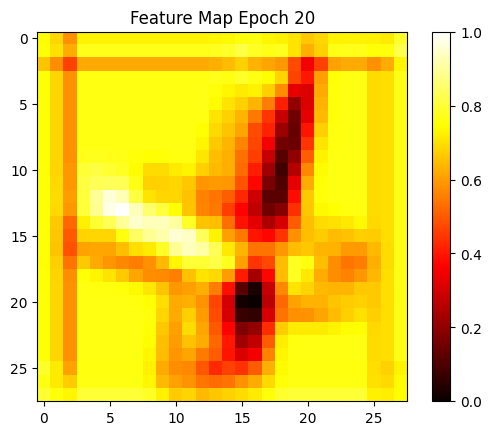

Epoch [21/500] Loss: 0.7254, Train Top-1 Acc: 0.7796, Train Top-3 Acc: 0.9443, Val Top-1 Acc: 0.8594, Val Top-3 Acc: 0.9703
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8594
Epoch [22/500] Loss: 0.7052, Train Top-1 Acc: 0.7845, Train Top-3 Acc: 0.9463, Val Top-1 Acc: 0.8530, Val Top-3 Acc: 0.9669
Epoch [23/500] Loss: 0.6977, Train Top-1 Acc: 0.7860, Train Top-3 Acc: 0.9477, Val Top-1 Acc: 0.8644, Val Top-3 Acc: 0.9703
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8644
Epoch [24/500] Loss: 0.6725, Train Top-1 Acc: 0.7933, Train Top-3 Acc: 0.9496, Val Top-1 Acc: 0.8595, Val Top-3 Acc: 0.9700
Epoch [25/500] Loss: 0.6581, Train Top-1 Acc: 0.7981, Train Top-3 Acc: 0.9508, Val Top-1 Acc: 0.8625, Val Top-3 Acc: 0.9688
Epoch [26/500] Loss: 0.6382, Train Top-1 Acc: 0.8038, Train Top-3 Acc: 0.9531, Val Top-1 Acc: 0.8541, Val Top-3 Acc: 0.9682
Epoch [27/500] Loss: 0.6286, Train Top-1 Acc: 0.8072, Train Top-3 Acc: 0.9555, Val Top-1 Acc: 0.8614, Val Top-3 Acc: 0.9697
Epoch [28/500] Loss: 0.6107, Train Top-1 Acc: 0.8127, Train Top-

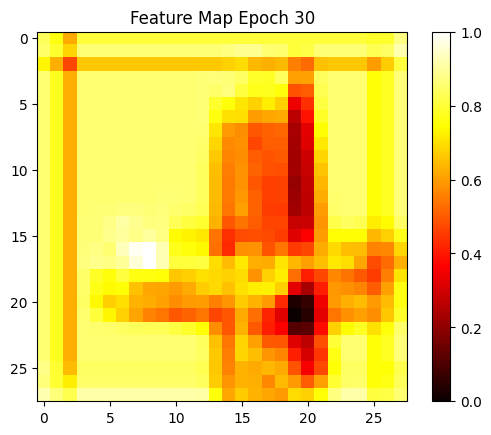

Epoch [31/500] Loss: 0.5872, Train Top-1 Acc: 0.8173, Train Top-3 Acc: 0.9594, Val Top-1 Acc: 0.8686, Val Top-3 Acc: 0.9738
Epoch [32/500] Loss: 0.5770, Train Top-1 Acc: 0.8212, Train Top-3 Acc: 0.9601, Val Top-1 Acc: 0.8695, Val Top-3 Acc: 0.9759
Epoch [33/500] Loss: 0.5659, Train Top-1 Acc: 0.8239, Train Top-3 Acc: 0.9615, Val Top-1 Acc: 0.8740, Val Top-3 Acc: 0.9762
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8740
Epoch [34/500] Loss: 0.5582, Train Top-1 Acc: 0.8263, Train Top-3 Acc: 0.9629, Val Top-1 Acc: 0.8723, Val Top-3 Acc: 0.9744
Epoch [35/500] Loss: 0.5466, Train Top-1 Acc: 0.8279, Train Top-3 Acc: 0.9641, Val Top-1 Acc: 0.8761, Val Top-3 Acc: 0.9750
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8761
Epoch [36/500] Loss: 0.5441, Train Top-1 Acc: 0.8300, Train Top-3 Acc: 0.9646, Val Top-1 Acc: 0.8823, Val Top-3 Acc: 0.9791
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8823
Epoch [37/500] Loss: 0.5347, Train Top-1 Acc: 0.8321, Train Top-3 Acc: 0.9649, Val Top-1 Acc: 0.8676, Val Top-3 Acc: 0.9767
Epoch [38/500] Loss: 0.5353, T

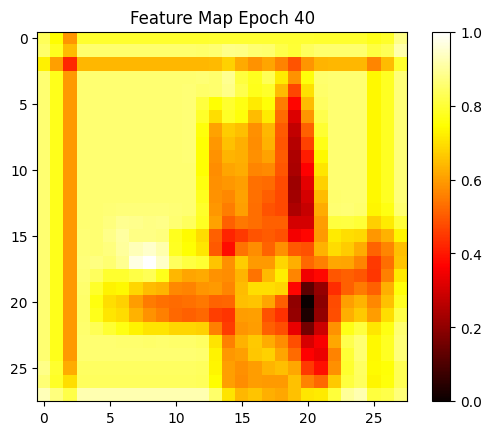

Epoch [41/500] Loss: 0.5088, Train Top-1 Acc: 0.8420, Train Top-3 Acc: 0.9665, Val Top-1 Acc: 0.8802, Val Top-3 Acc: 0.9772
Epoch [42/500] Loss: 0.5047, Train Top-1 Acc: 0.8412, Train Top-3 Acc: 0.9678, Val Top-1 Acc: 0.8813, Val Top-3 Acc: 0.9794
Epoch [43/500] Loss: 0.5035, Train Top-1 Acc: 0.8411, Train Top-3 Acc: 0.9676, Val Top-1 Acc: 0.8728, Val Top-3 Acc: 0.9769
Epoch [44/500] Loss: 0.4972, Train Top-1 Acc: 0.8441, Train Top-3 Acc: 0.9680, Val Top-1 Acc: 0.8567, Val Top-3 Acc: 0.9688
Epoch [45/500] Loss: 0.4876, Train Top-1 Acc: 0.8466, Train Top-3 Acc: 0.9698, Val Top-1 Acc: 0.8831, Val Top-3 Acc: 0.9797
Epoch [46/500] Loss: 0.4869, Train Top-1 Acc: 0.8471, Train Top-3 Acc: 0.9692, Val Top-1 Acc: 0.8860, Val Top-3 Acc: 0.9765
Epoch [47/500] Loss: 0.4787, Train Top-1 Acc: 0.8484, Train Top-3 Acc: 0.9708, Val Top-1 Acc: 0.8931, Val Top-3 Acc: 0.9803
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8931
Epoch [48/500] Loss: 0.4828, Train Top-1 Acc: 0.8478, Train Top-3 Acc: 0.9693, Val Top-1 Acc: 0.88

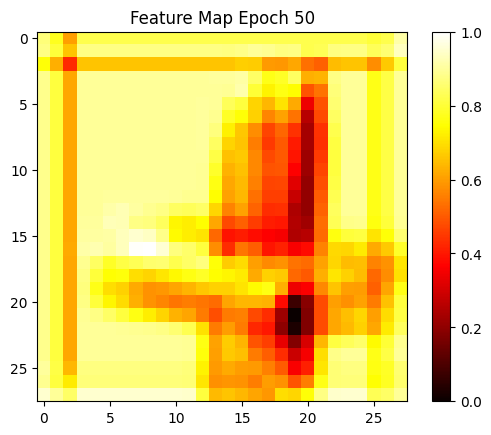

Epoch [51/500] Loss: 0.4680, Train Top-1 Acc: 0.8518, Train Top-3 Acc: 0.9709, Val Top-1 Acc: 0.8939, Val Top-3 Acc: 0.9817
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8939
Epoch [52/500] Loss: 0.4573, Train Top-1 Acc: 0.8561, Train Top-3 Acc: 0.9714, Val Top-1 Acc: 0.8948, Val Top-3 Acc: 0.9819
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8948
Epoch [53/500] Loss: 0.4570, Train Top-1 Acc: 0.8573, Train Top-3 Acc: 0.9734, Val Top-1 Acc: 0.8911, Val Top-3 Acc: 0.9815
Epoch [54/500] Loss: 0.4567, Train Top-1 Acc: 0.8556, Train Top-3 Acc: 0.9729, Val Top-1 Acc: 0.8944, Val Top-3 Acc: 0.9818
Epoch [55/500] Loss: 0.4513, Train Top-1 Acc: 0.8583, Train Top-3 Acc: 0.9737, Val Top-1 Acc: 0.8798, Val Top-3 Acc: 0.9762
Epoch [56/500] Loss: 0.4469, Train Top-1 Acc: 0.8579, Train Top-3 Acc: 0.9735, Val Top-1 Acc: 0.8879, Val Top-3 Acc: 0.9787
Epoch [57/500] Loss: 0.4457, Train Top-1 Acc: 0.8586, Train Top-3 Acc: 0.9740, Val Top-1 Acc: 0.8914, Val Top-3 Acc: 0.9835
Epoch [58/500] Loss: 0.4429, Train Top-1 Acc: 0.8589, Train Top-

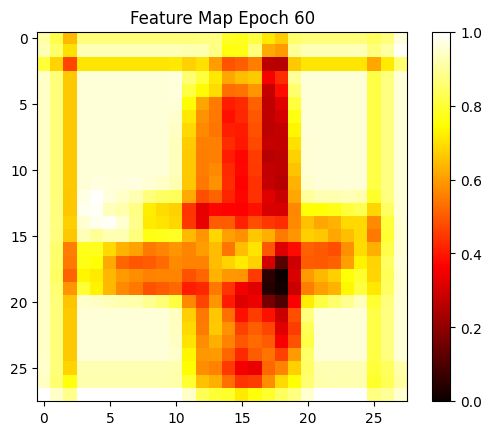

Epoch [61/500] Loss: 0.4316, Train Top-1 Acc: 0.8637, Train Top-3 Acc: 0.9753, Val Top-1 Acc: 0.8935, Val Top-3 Acc: 0.9818
Epoch [62/500] Loss: 0.4343, Train Top-1 Acc: 0.8618, Train Top-3 Acc: 0.9748, Val Top-1 Acc: 0.8891, Val Top-3 Acc: 0.9811
Epoch [63/500] Loss: 0.4252, Train Top-1 Acc: 0.8649, Train Top-3 Acc: 0.9754, Val Top-1 Acc: 0.8947, Val Top-3 Acc: 0.9814
Epoch [64/500] Loss: 0.4262, Train Top-1 Acc: 0.8633, Train Top-3 Acc: 0.9756, Val Top-1 Acc: 0.8912, Val Top-3 Acc: 0.9828
Epoch [65/500] Loss: 0.4260, Train Top-1 Acc: 0.8653, Train Top-3 Acc: 0.9752, Val Top-1 Acc: 0.8909, Val Top-3 Acc: 0.9803
Epoch [66/500] Loss: 0.4157, Train Top-1 Acc: 0.8684, Train Top-3 Acc: 0.9764, Val Top-1 Acc: 0.8951, Val Top-3 Acc: 0.9824
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8951
Epoch [67/500] Loss: 0.4196, Train Top-1 Acc: 0.8659, Train Top-3 Acc: 0.9756, Val Top-1 Acc: 0.8982, Val Top-3 Acc: 0.9821
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8982
Epoch [68/500] Loss: 0.4161, Train Top-1 Acc: 0.8690, Train Top-

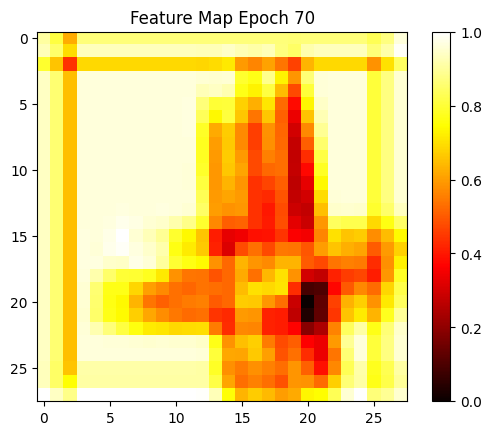

Epoch [71/500] Loss: 0.4108, Train Top-1 Acc: 0.8695, Train Top-3 Acc: 0.9762, Val Top-1 Acc: 0.8923, Val Top-3 Acc: 0.9830
Epoch [72/500] Loss: 0.3993, Train Top-1 Acc: 0.8736, Train Top-3 Acc: 0.9779, Val Top-1 Acc: 0.8955, Val Top-3 Acc: 0.9824
Epoch [73/500] Loss: 0.4036, Train Top-1 Acc: 0.8717, Train Top-3 Acc: 0.9769, Val Top-1 Acc: 0.8941, Val Top-3 Acc: 0.9832
Epoch [74/500] Loss: 0.3989, Train Top-1 Acc: 0.8723, Train Top-3 Acc: 0.9779, Val Top-1 Acc: 0.8988, Val Top-3 Acc: 0.9842
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8988
Epoch [75/500] Loss: 0.3986, Train Top-1 Acc: 0.8721, Train Top-3 Acc: 0.9782, Val Top-1 Acc: 0.8980, Val Top-3 Acc: 0.9829
Epoch [76/500] Loss: 0.3988, Train Top-1 Acc: 0.8718, Train Top-3 Acc: 0.9785, Val Top-1 Acc: 0.8998, Val Top-3 Acc: 0.9832
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8998
Epoch [77/500] Loss: 0.3948, Train Top-1 Acc: 0.8748, Train Top-3 Acc: 0.9781, Val Top-1 Acc: 0.8997, Val Top-3 Acc: 0.9831
Epoch [78/500] Loss: 0.3916, Train Top-1 Acc: 0.8754, Train Top-

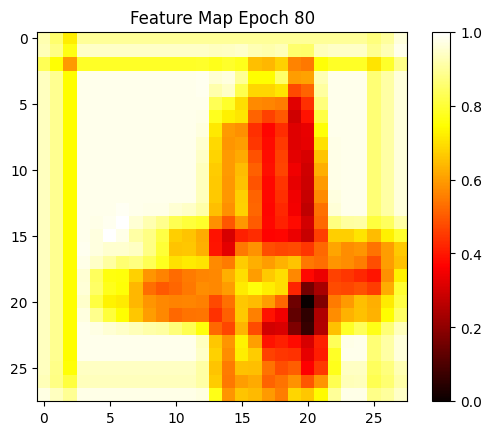

Epoch [81/500] Loss: 0.3894, Train Top-1 Acc: 0.8754, Train Top-3 Acc: 0.9788, Val Top-1 Acc: 0.9028, Val Top-3 Acc: 0.9850
Epoch [82/500] Loss: 0.3832, Train Top-1 Acc: 0.8781, Train Top-3 Acc: 0.9792, Val Top-1 Acc: 0.9038, Val Top-3 Acc: 0.9844
Epoch [83/500] Loss: 0.3842, Train Top-1 Acc: 0.8771, Train Top-3 Acc: 0.9795, Val Top-1 Acc: 0.9034, Val Top-3 Acc: 0.9840
Epoch [84/500] Loss: 0.3841, Train Top-1 Acc: 0.8774, Train Top-3 Acc: 0.9798, Val Top-1 Acc: 0.9015, Val Top-3 Acc: 0.9856
Epoch [85/500] Loss: 0.3804, Train Top-1 Acc: 0.8782, Train Top-3 Acc: 0.9801, Val Top-1 Acc: 0.9013, Val Top-3 Acc: 0.9857
Epoch [86/500] Loss: 0.3788, Train Top-1 Acc: 0.8786, Train Top-3 Acc: 0.9800, Val Top-1 Acc: 0.9077, Val Top-3 Acc: 0.9863
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9077
Epoch [87/500] Loss: 0.3831, Train Top-1 Acc: 0.8761, Train Top-3 Acc: 0.9798, Val Top-1 Acc: 0.9027, Val Top-3 Acc: 0.9854
Epoch [88/500] Loss: 0.3746, Train Top-1 Acc: 0.8797, Train Top-3 Acc: 0.9809, Val Top-1 Acc: 0.90

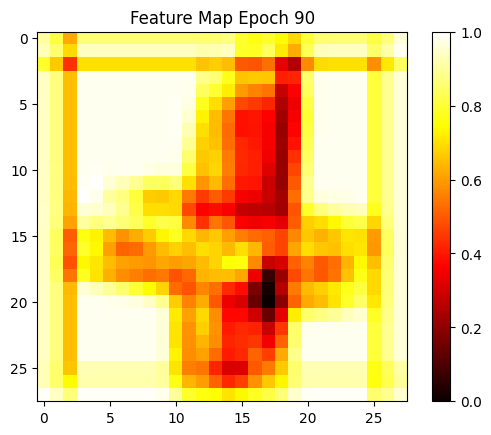

Epoch [91/500] Loss: 0.3737, Train Top-1 Acc: 0.8791, Train Top-3 Acc: 0.9805, Val Top-1 Acc: 0.9063, Val Top-3 Acc: 0.9860
Epoch [92/500] Loss: 0.3651, Train Top-1 Acc: 0.8824, Train Top-3 Acc: 0.9819, Val Top-1 Acc: 0.9043, Val Top-3 Acc: 0.9849
Epoch [93/500] Loss: 0.3709, Train Top-1 Acc: 0.8789, Train Top-3 Acc: 0.9810, Val Top-1 Acc: 0.9015, Val Top-3 Acc: 0.9829
Epoch [94/500] Loss: 0.3647, Train Top-1 Acc: 0.8829, Train Top-3 Acc: 0.9816, Val Top-1 Acc: 0.9055, Val Top-3 Acc: 0.9851
Epoch [95/500] Loss: 0.3654, Train Top-1 Acc: 0.8821, Train Top-3 Acc: 0.9804, Val Top-1 Acc: 0.9050, Val Top-3 Acc: 0.9859
Epoch [96/500] Loss: 0.3655, Train Top-1 Acc: 0.8833, Train Top-3 Acc: 0.9813, Val Top-1 Acc: 0.9103, Val Top-3 Acc: 0.9865
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9103
Epoch [97/500] Loss: 0.3625, Train Top-1 Acc: 0.8832, Train Top-3 Acc: 0.9813, Val Top-1 Acc: 0.9047, Val Top-3 Acc: 0.9856
Epoch [98/500] Loss: 0.3625, Train Top-1 Acc: 0.8841, Train Top-3 Acc: 0.9808, Val Top-1 Acc: 0.90

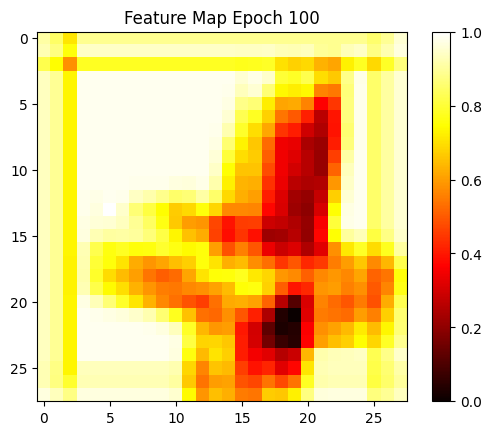

Epoch [101/500] Loss: 0.3560, Train Top-1 Acc: 0.8853, Train Top-3 Acc: 0.9823, Val Top-1 Acc: 0.9074, Val Top-3 Acc: 0.9866
Epoch [102/500] Loss: 0.3567, Train Top-1 Acc: 0.8842, Train Top-3 Acc: 0.9821, Val Top-1 Acc: 0.9070, Val Top-3 Acc: 0.9858
Epoch [103/500] Loss: 0.3551, Train Top-1 Acc: 0.8840, Train Top-3 Acc: 0.9819, Val Top-1 Acc: 0.9057, Val Top-3 Acc: 0.9857
Epoch [104/500] Loss: 0.3561, Train Top-1 Acc: 0.8840, Train Top-3 Acc: 0.9822, Val Top-1 Acc: 0.9056, Val Top-3 Acc: 0.9861
Epoch [105/500] Loss: 0.3543, Train Top-1 Acc: 0.8858, Train Top-3 Acc: 0.9821, Val Top-1 Acc: 0.9108, Val Top-3 Acc: 0.9858
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9108
Epoch [106/500] Loss: 0.3582, Train Top-1 Acc: 0.8842, Train Top-3 Acc: 0.9819, Val Top-1 Acc: 0.9107, Val Top-3 Acc: 0.9869
Epoch [107/500] Loss: 0.3487, Train Top-1 Acc: 0.8858, Train Top-3 Acc: 0.9830, Val Top-1 Acc: 0.9052, Val Top-3 Acc: 0.9853
Epoch [108/500] Loss: 0.3535, Train Top-1 Acc: 0.8851, Train Top-3 Acc: 0.9823, Val Top-1 A

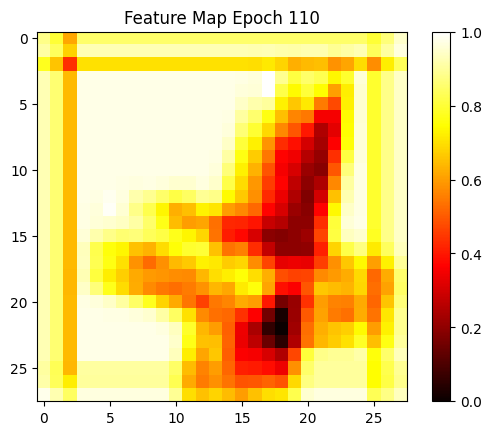

Epoch [111/500] Loss: 0.3487, Train Top-1 Acc: 0.8860, Train Top-3 Acc: 0.9822, Val Top-1 Acc: 0.9001, Val Top-3 Acc: 0.9840
Epoch [112/500] Loss: 0.3453, Train Top-1 Acc: 0.8875, Train Top-3 Acc: 0.9833, Val Top-1 Acc: 0.9086, Val Top-3 Acc: 0.9863
Epoch [113/500] Loss: 0.3426, Train Top-1 Acc: 0.8876, Train Top-3 Acc: 0.9833, Val Top-1 Acc: 0.9016, Val Top-3 Acc: 0.9865
Epoch [114/500] Loss: 0.3459, Train Top-1 Acc: 0.8876, Train Top-3 Acc: 0.9834, Val Top-1 Acc: 0.9089, Val Top-3 Acc: 0.9859
Epoch [115/500] Loss: 0.3475, Train Top-1 Acc: 0.8875, Train Top-3 Acc: 0.9831, Val Top-1 Acc: 0.9070, Val Top-3 Acc: 0.9849
Epoch [116/500] Loss: 0.3398, Train Top-1 Acc: 0.8882, Train Top-3 Acc: 0.9832, Val Top-1 Acc: 0.9061, Val Top-3 Acc: 0.9854
Epoch [117/500] Loss: 0.3394, Train Top-1 Acc: 0.8895, Train Top-3 Acc: 0.9836, Val Top-1 Acc: 0.9099, Val Top-3 Acc: 0.9866
Epoch [118/500] Loss: 0.3376, Train Top-1 Acc: 0.8890, Train Top-3 Acc: 0.9845, Val Top-1 Acc: 0.9098, Val Top-3 Acc: 0.9864


In [5]:
model = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_aug_best.pth"
)

### 无数据增强

训练集每个类别样本数：
类别 A: 1400
类别 B: 1400
类别 C: 1400
类别 D: 1400
类别 E: 1400
类别 F: 1400
类别 G: 1400
类别 H: 1400
类别 I: 1400
类别 J: 1400
类别 K: 1400
类别 L: 1400
类别 M: 1400
类别 N: 1400
类别 O: 1400
类别 P: 1400
类别 Q: 1400
类别 R: 1400
类别 S: 1400
类别 T: 1400
类别 U: 1400
类别 V: 1400
类别 W: 1400
类别 X: 1400
类别 Y: 1400
类别 Z: 1400
类别 a_: 1400
类别 b_: 1400
类别 d_: 1400
类别 e_: 1400
类别 f_: 1400
类别 g_: 1400
类别 h_: 1400
类别 n_: 1400
类别 q_: 1400
类别 r_: 1400
类别 t_: 1400

验证集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 Q: 300
类别 R: 300
类别 S: 300
类别 T: 300
类别 U: 300
类别 V: 300
类别 W: 300
类别 X: 300
类别 Y: 300
类别 Z: 300
类别 a_: 300
类别 b_: 300
类别 d_: 300
类别 e_: 300
类别 f_: 300
类别 g_: 300
类别 h_: 300
类别 n_: 300
类别 q_: 300
类别 r_: 300
类别 t_: 300

测试集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 

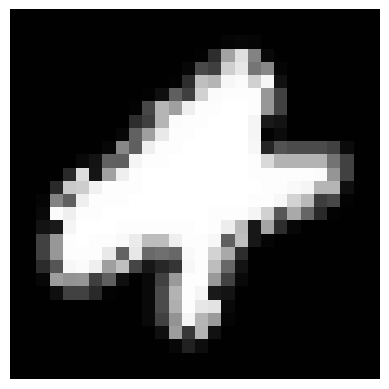

In [6]:
transform = AlbumentationsTransformBase()  # 不使用数据增强


train_loader, val_loader, test_loader, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42,
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

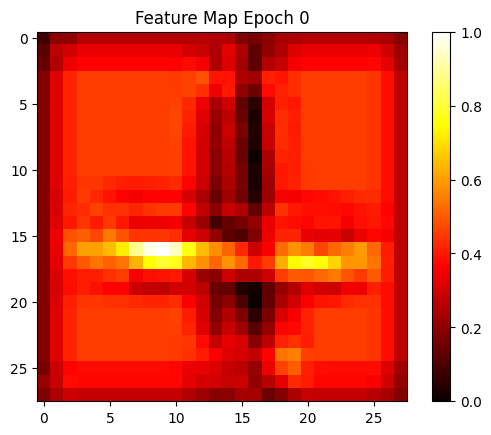

Epoch [1/500] Loss: 3.4355, Train Top-1 Acc: 0.0901, Train Top-3 Acc: 0.2164, Val Top-1 Acc: 0.2001, Val Top-3 Acc: 0.4268
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2001
Epoch [2/500] Loss: 2.9912, Train Top-1 Acc: 0.1943, Train Top-3 Acc: 0.4328, Val Top-1 Acc: 0.3206, Val Top-3 Acc: 0.5875
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.3206
Epoch [3/500] Loss: 2.5930, Train Top-1 Acc: 0.3049, Train Top-3 Acc: 0.5817, Val Top-1 Acc: 0.4403, Val Top-3 Acc: 0.7059
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.4403
Epoch [4/500] Loss: 2.2132, Train Top-1 Acc: 0.4308, Train Top-3 Acc: 0.7240, Val Top-1 Acc: 0.6161, Val Top-3 Acc: 0.8747
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.6161
Epoch [5/500] Loss: 1.8310, Train Top-1 Acc: 0.5674, Train Top-3 Acc: 0.8352, Val Top-1 Acc: 0.7001, Val Top-3 Acc: 0.8985
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7001
Epoch [6/500] Loss: 1.4512, Train Top-1 Acc: 0.6853, Train Top-3 Acc: 0.8985, Val Top-1 Acc: 0.7819, Val Top-3 Acc: 0.9357
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7819
Epoch [7/500] Loss: 1.1215, Train Top-1 Acc: 0.7695, Train

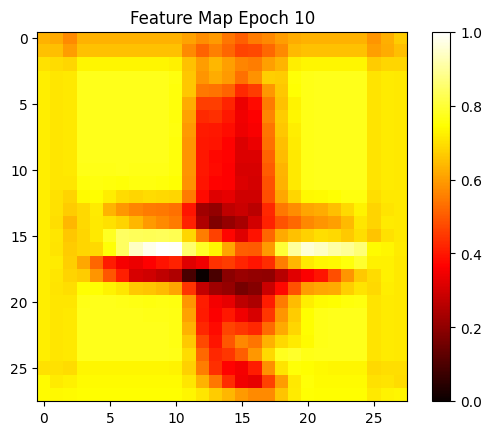

Epoch [11/500] Loss: 0.6184, Train Top-1 Acc: 0.8456, Train Top-3 Acc: 0.9668, Val Top-1 Acc: 0.8220, Val Top-3 Acc: 0.9548
Epoch [12/500] Loss: 0.5662, Train Top-1 Acc: 0.8553, Train Top-3 Acc: 0.9696, Val Top-1 Acc: 0.8623, Val Top-3 Acc: 0.9696
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8623
Epoch [13/500] Loss: 0.5286, Train Top-1 Acc: 0.8598, Train Top-3 Acc: 0.9716, Val Top-1 Acc: 0.8521, Val Top-3 Acc: 0.9702
Epoch [14/500] Loss: 0.4979, Train Top-1 Acc: 0.8625, Train Top-3 Acc: 0.9731, Val Top-1 Acc: 0.8794, Val Top-3 Acc: 0.9764
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8794
Epoch [15/500] Loss: 0.4685, Train Top-1 Acc: 0.8708, Train Top-3 Acc: 0.9750, Val Top-1 Acc: 0.8539, Val Top-3 Acc: 0.9693
Epoch [16/500] Loss: 0.4476, Train Top-1 Acc: 0.8742, Train Top-3 Acc: 0.9767, Val Top-1 Acc: 0.8835, Val Top-3 Acc: 0.9791
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8835
Epoch [17/500] Loss: 0.4297, Train Top-1 Acc: 0.8775, Train Top-3 Acc: 0.9784, Val Top-1 Acc: 0.8756, Val Top-3 Acc: 0.9763
Epoch [18/500] Loss: 0.4129, T

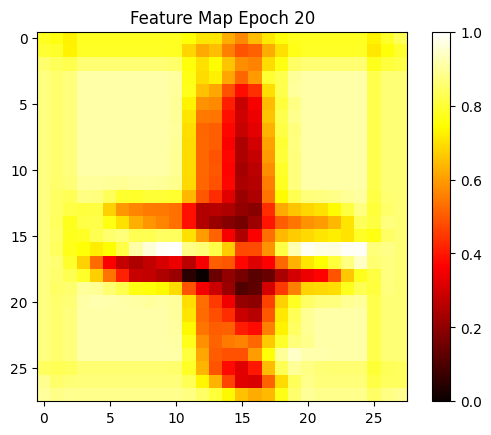

Epoch [21/500] Loss: 0.3724, Train Top-1 Acc: 0.8880, Train Top-3 Acc: 0.9823, Val Top-1 Acc: 0.8910, Val Top-3 Acc: 0.9822
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8910
Epoch [22/500] Loss: 0.3645, Train Top-1 Acc: 0.8898, Train Top-3 Acc: 0.9825, Val Top-1 Acc: 0.8845, Val Top-3 Acc: 0.9803
Epoch [23/500] Loss: 0.3520, Train Top-1 Acc: 0.8928, Train Top-3 Acc: 0.9831, Val Top-1 Acc: 0.8956, Val Top-3 Acc: 0.9821
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8956
Epoch [24/500] Loss: 0.3479, Train Top-1 Acc: 0.8935, Train Top-3 Acc: 0.9832, Val Top-1 Acc: 0.8949, Val Top-3 Acc: 0.9821
Epoch [25/500] Loss: 0.3419, Train Top-1 Acc: 0.8933, Train Top-3 Acc: 0.9839, Val Top-1 Acc: 0.8968, Val Top-3 Acc: 0.9829
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8968
Epoch [26/500] Loss: 0.3351, Train Top-1 Acc: 0.8964, Train Top-3 Acc: 0.9849, Val Top-1 Acc: 0.8888, Val Top-3 Acc: 0.9815
Epoch [27/500] Loss: 0.3286, Train Top-1 Acc: 0.8971, Train Top-3 Acc: 0.9849, Val Top-1 Acc: 0.8960, Val Top-3 Acc: 0.9818
Epoch [28/500] Loss: 0.3224, T

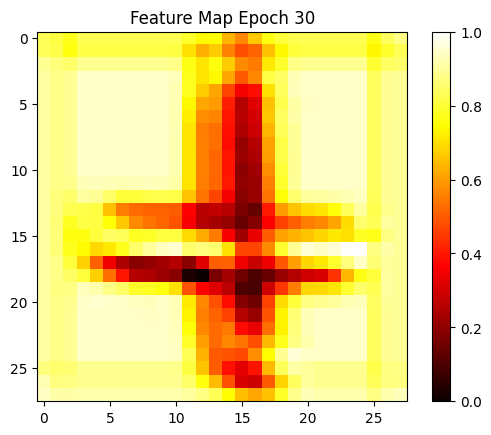

Epoch [31/500] Loss: 0.3081, Train Top-1 Acc: 0.9022, Train Top-3 Acc: 0.9864, Val Top-1 Acc: 0.8998, Val Top-3 Acc: 0.9834
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8998
Epoch [32/500] Loss: 0.3028, Train Top-1 Acc: 0.9031, Train Top-3 Acc: 0.9868, Val Top-1 Acc: 0.9039, Val Top-3 Acc: 0.9842
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9039
Epoch [33/500] Loss: 0.2993, Train Top-1 Acc: 0.9048, Train Top-3 Acc: 0.9870, Val Top-1 Acc: 0.9035, Val Top-3 Acc: 0.9842
Epoch [34/500] Loss: 0.2958, Train Top-1 Acc: 0.9043, Train Top-3 Acc: 0.9868, Val Top-1 Acc: 0.8947, Val Top-3 Acc: 0.9809
Epoch [35/500] Loss: 0.2929, Train Top-1 Acc: 0.9056, Train Top-3 Acc: 0.9878, Val Top-1 Acc: 0.9084, Val Top-3 Acc: 0.9861
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9084
Epoch [36/500] Loss: 0.2873, Train Top-1 Acc: 0.9060, Train Top-3 Acc: 0.9877, Val Top-1 Acc: 0.9025, Val Top-3 Acc: 0.9841
Epoch [37/500] Loss: 0.2853, Train Top-1 Acc: 0.9076, Train Top-3 Acc: 0.9876, Val Top-1 Acc: 0.9050, Val Top-3 Acc: 0.9843
Epoch [38/500] Loss: 0.2824, T

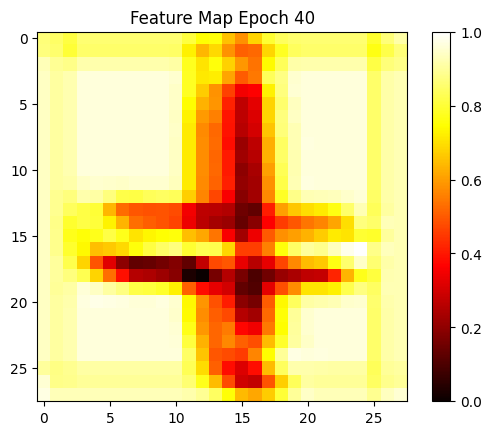

Epoch [41/500] Loss: 0.2747, Train Top-1 Acc: 0.9099, Train Top-3 Acc: 0.9888, Val Top-1 Acc: 0.9068, Val Top-3 Acc: 0.9848
Epoch [42/500] Loss: 0.2717, Train Top-1 Acc: 0.9114, Train Top-3 Acc: 0.9895, Val Top-1 Acc: 0.9103, Val Top-3 Acc: 0.9843
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9103
Epoch [43/500] Loss: 0.2711, Train Top-1 Acc: 0.9128, Train Top-3 Acc: 0.9893, Val Top-1 Acc: 0.9039, Val Top-3 Acc: 0.9825
Epoch [44/500] Loss: 0.2675, Train Top-1 Acc: 0.9125, Train Top-3 Acc: 0.9896, Val Top-1 Acc: 0.9070, Val Top-3 Acc: 0.9856
Epoch [45/500] Loss: 0.2649, Train Top-1 Acc: 0.9139, Train Top-3 Acc: 0.9896, Val Top-1 Acc: 0.9000, Val Top-3 Acc: 0.9823
Epoch [46/500] Loss: 0.2598, Train Top-1 Acc: 0.9149, Train Top-3 Acc: 0.9897, Val Top-1 Acc: 0.8834, Val Top-3 Acc: 0.9811
Epoch [47/500] Loss: 0.2603, Train Top-1 Acc: 0.9141, Train Top-3 Acc: 0.9900, Val Top-1 Acc: 0.8914, Val Top-3 Acc: 0.9829
Epoch [48/500] Loss: 0.2563, Train Top-1 Acc: 0.9158, Train Top-3 Acc: 0.9902, Val Top-1 Acc: 0.91

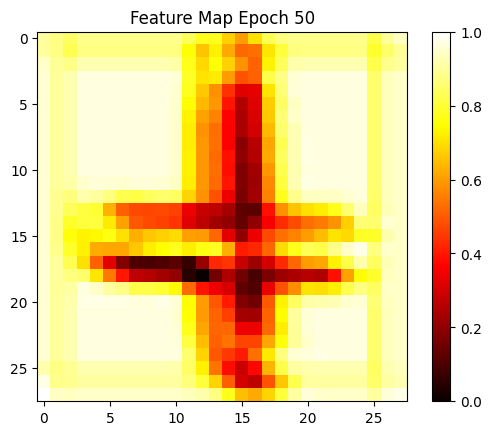

Epoch [51/500] Loss: 0.2512, Train Top-1 Acc: 0.9168, Train Top-3 Acc: 0.9909, Val Top-1 Acc: 0.9096, Val Top-3 Acc: 0.9864
Epoch [52/500] Loss: 0.2519, Train Top-1 Acc: 0.9171, Train Top-3 Acc: 0.9908, Val Top-1 Acc: 0.9093, Val Top-3 Acc: 0.9863
Epoch [53/500] Loss: 0.2452, Train Top-1 Acc: 0.9182, Train Top-3 Acc: 0.9911, Val Top-1 Acc: 0.9110, Val Top-3 Acc: 0.9867
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9110
Epoch [54/500] Loss: 0.2413, Train Top-1 Acc: 0.9191, Train Top-3 Acc: 0.9917, Val Top-1 Acc: 0.9143, Val Top-3 Acc: 0.9876
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9143
Epoch [55/500] Loss: 0.2431, Train Top-1 Acc: 0.9189, Train Top-3 Acc: 0.9913, Val Top-1 Acc: 0.9009, Val Top-3 Acc: 0.9840
Epoch [56/500] Loss: 0.2429, Train Top-1 Acc: 0.9182, Train Top-3 Acc: 0.9916, Val Top-1 Acc: 0.9043, Val Top-3 Acc: 0.9852
Epoch [57/500] Loss: 0.2430, Train Top-1 Acc: 0.9197, Train Top-3 Acc: 0.9912, Val Top-1 Acc: 0.8986, Val Top-3 Acc: 0.9851
Epoch [58/500] Loss: 0.2394, Train Top-1 Acc: 0.9205, Train Top-

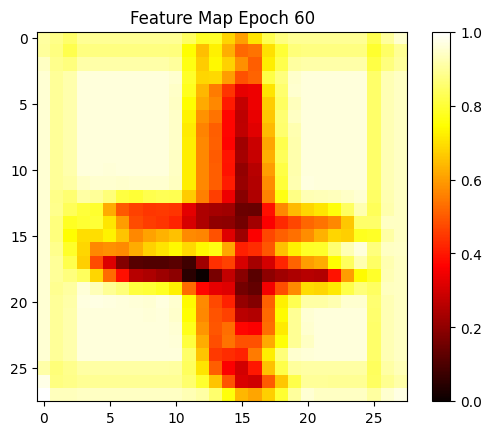

Epoch [61/500] Loss: 0.2332, Train Top-1 Acc: 0.9219, Train Top-3 Acc: 0.9918, Val Top-1 Acc: 0.9066, Val Top-3 Acc: 0.9856
Epoch [62/500] Loss: 0.2304, Train Top-1 Acc: 0.9238, Train Top-3 Acc: 0.9925, Val Top-1 Acc: 0.9074, Val Top-3 Acc: 0.9852
Epoch [63/500] Loss: 0.2265, Train Top-1 Acc: 0.9249, Train Top-3 Acc: 0.9925, Val Top-1 Acc: 0.9028, Val Top-3 Acc: 0.9839
Epoch [64/500] Loss: 0.2290, Train Top-1 Acc: 0.9228, Train Top-3 Acc: 0.9925, Val Top-1 Acc: 0.9006, Val Top-3 Acc: 0.9850
Epoch [65/500] Loss: 0.2319, Train Top-1 Acc: 0.9210, Train Top-3 Acc: 0.9922, Val Top-1 Acc: 0.9123, Val Top-3 Acc: 0.9872
Epoch [66/500] Loss: 0.2270, Train Top-1 Acc: 0.9229, Train Top-3 Acc: 0.9926, Val Top-1 Acc: 0.8924, Val Top-3 Acc: 0.9827
Epoch [67/500] Loss: 0.2259, Train Top-1 Acc: 0.9241, Train Top-3 Acc: 0.9927, Val Top-1 Acc: 0.9107, Val Top-3 Acc: 0.9874
Epoch [68/500] Loss: 0.2198, Train Top-1 Acc: 0.9253, Train Top-3 Acc: 0.9933, Val Top-1 Acc: 0.9117, Val Top-3 Acc: 0.9859
Epoch [6

In [7]:
model = CNNWithAttention(label_num, use_attention=True) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_noaug_best.pth",
    lr=LR
)

### 训练模型（无注意力机制）

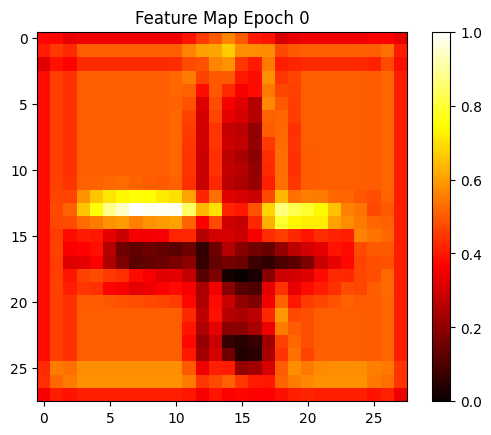

Epoch [1/500] Loss: 3.3887, Train Top-1 Acc: 0.0968, Train Top-3 Acc: 0.2373, Val Top-1 Acc: 0.2212, Val Top-3 Acc: 0.4904
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2212
Epoch [2/500] Loss: 2.8906, Train Top-1 Acc: 0.2137, Train Top-3 Acc: 0.4691, Val Top-1 Acc: 0.3090, Val Top-3 Acc: 0.5999
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.3090
Epoch [3/500] Loss: 2.5359, Train Top-1 Acc: 0.3111, Train Top-3 Acc: 0.6001, Val Top-1 Acc: 0.4235, Val Top-3 Acc: 0.7390
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.4235
Epoch [4/500] Loss: 2.2426, Train Top-1 Acc: 0.3949, Train Top-3 Acc: 0.6961, Val Top-1 Acc: 0.5550, Val Top-3 Acc: 0.8371
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.5550
Epoch [5/500] Loss: 1.9938, Train Top-1 Acc: 0.4664, Train Top-3 Acc: 0.7631, Val Top-1 Acc: 0.6368, Val Top-3 Acc: 0.8848
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.6368
Epoch [6/500] Loss: 1.7718, Train Top-1 Acc: 0.5341, Train Top-3 Acc: 0.8177, Val Top-1 Acc: 0.7207, Val Top-3 Acc: 0.9172
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7207
Epoch [7/500] Loss: 1.5809, Train Top-1 Acc: 0.5932, Train

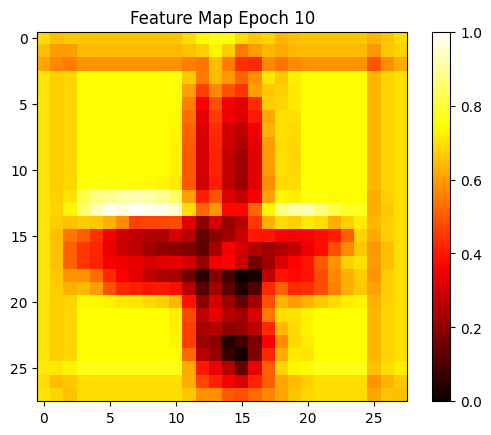

Epoch [11/500] Loss: 1.0937, Train Top-1 Acc: 0.6989, Train Top-3 Acc: 0.9068, Val Top-1 Acc: 0.8167, Val Top-3 Acc: 0.9505
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8167
Epoch [12/500] Loss: 1.0258, Train Top-1 Acc: 0.7119, Train Top-3 Acc: 0.9105, Val Top-1 Acc: 0.8268, Val Top-3 Acc: 0.9547
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8268
Epoch [13/500] Loss: 0.9628, Train Top-1 Acc: 0.7279, Train Top-3 Acc: 0.9187, Val Top-1 Acc: 0.8361, Val Top-3 Acc: 0.9586
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8361
Epoch [14/500] Loss: 0.9099, Train Top-1 Acc: 0.7405, Train Top-3 Acc: 0.9251, Val Top-1 Acc: 0.8490, Val Top-3 Acc: 0.9620
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8490
Epoch [15/500] Loss: 0.8684, Train Top-1 Acc: 0.7486, Train Top-3 Acc: 0.9287, Val Top-1 Acc: 0.8532, Val Top-3 Acc: 0.9622
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8532
Epoch [16/500] Loss: 0.8239, Train Top-1 Acc: 0.7612, Train Top-3 Acc: 0.9327, Val Top-1 Acc: 0.8429, Val Top-3 Acc: 0.9601
Epoch [17/500] Loss: 0.7911, Train Top-1 Acc: 0.7682, Train Top-3 Acc: 0.9371, Val Top

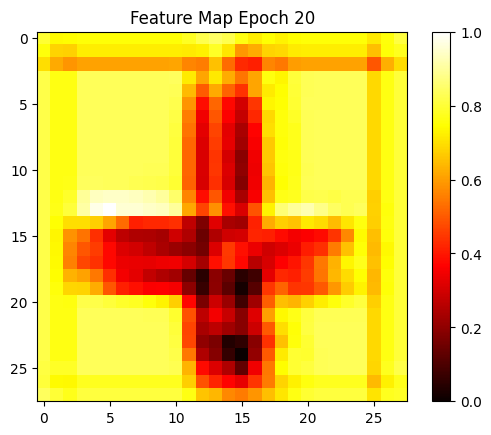

Epoch [21/500] Loss: 0.6851, Train Top-1 Acc: 0.7928, Train Top-3 Acc: 0.9486, Val Top-1 Acc: 0.8679, Val Top-3 Acc: 0.9723
Epoch [22/500] Loss: 0.6675, Train Top-1 Acc: 0.7978, Train Top-3 Acc: 0.9507, Val Top-1 Acc: 0.8744, Val Top-3 Acc: 0.9733
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8744
Epoch [23/500] Loss: 0.6495, Train Top-1 Acc: 0.8030, Train Top-3 Acc: 0.9518, Val Top-1 Acc: 0.8708, Val Top-3 Acc: 0.9727
Epoch [24/500] Loss: 0.6306, Train Top-1 Acc: 0.8072, Train Top-3 Acc: 0.9542, Val Top-1 Acc: 0.8700, Val Top-3 Acc: 0.9734
Epoch [25/500] Loss: 0.6218, Train Top-1 Acc: 0.8105, Train Top-3 Acc: 0.9533, Val Top-1 Acc: 0.8736, Val Top-3 Acc: 0.9759
Epoch [26/500] Loss: 0.6075, Train Top-1 Acc: 0.8138, Train Top-3 Acc: 0.9572, Val Top-1 Acc: 0.8729, Val Top-3 Acc: 0.9756
Epoch [27/500] Loss: 0.5950, Train Top-1 Acc: 0.8160, Train Top-3 Acc: 0.9581, Val Top-1 Acc: 0.8756, Val Top-3 Acc: 0.9750
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8756
Epoch [28/500] Loss: 0.5816, Train Top-1 Acc: 0.8220, Train Top-

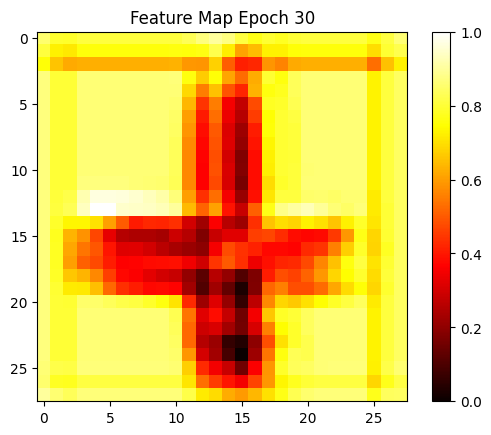

Epoch [31/500] Loss: 0.5520, Train Top-1 Acc: 0.8278, Train Top-3 Acc: 0.9622, Val Top-1 Acc: 0.8858, Val Top-3 Acc: 0.9775
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8858
Epoch [32/500] Loss: 0.5406, Train Top-1 Acc: 0.8320, Train Top-3 Acc: 0.9648, Val Top-1 Acc: 0.8808, Val Top-3 Acc: 0.9759
Epoch [33/500] Loss: 0.5349, Train Top-1 Acc: 0.8342, Train Top-3 Acc: 0.9643, Val Top-1 Acc: 0.8851, Val Top-3 Acc: 0.9771
Epoch [34/500] Loss: 0.5237, Train Top-1 Acc: 0.8378, Train Top-3 Acc: 0.9650, Val Top-1 Acc: 0.8844, Val Top-3 Acc: 0.9799
Epoch [35/500] Loss: 0.5143, Train Top-1 Acc: 0.8408, Train Top-3 Acc: 0.9658, Val Top-1 Acc: 0.8862, Val Top-3 Acc: 0.9794
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8862
Epoch [36/500] Loss: 0.5072, Train Top-1 Acc: 0.8416, Train Top-3 Acc: 0.9668, Val Top-1 Acc: 0.8872, Val Top-3 Acc: 0.9789
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8872
Epoch [37/500] Loss: 0.4946, Train Top-1 Acc: 0.8453, Train Top-3 Acc: 0.9678, Val Top-1 Acc: 0.8882, Val Top-3 Acc: 0.9814
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8

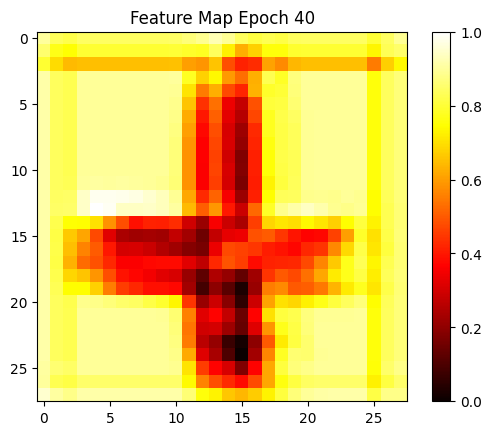

Epoch [41/500] Loss: 0.4803, Train Top-1 Acc: 0.8491, Train Top-3 Acc: 0.9699, Val Top-1 Acc: 0.8935, Val Top-3 Acc: 0.9809
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8935
Epoch [42/500] Loss: 0.4749, Train Top-1 Acc: 0.8513, Train Top-3 Acc: 0.9703, Val Top-1 Acc: 0.8918, Val Top-3 Acc: 0.9808
Epoch [43/500] Loss: 0.4667, Train Top-1 Acc: 0.8516, Train Top-3 Acc: 0.9716, Val Top-1 Acc: 0.8928, Val Top-3 Acc: 0.9823
Epoch [44/500] Loss: 0.4625, Train Top-1 Acc: 0.8558, Train Top-3 Acc: 0.9706, Val Top-1 Acc: 0.8904, Val Top-3 Acc: 0.9791
Epoch [45/500] Loss: 0.4614, Train Top-1 Acc: 0.8541, Train Top-3 Acc: 0.9715, Val Top-1 Acc: 0.8911, Val Top-3 Acc: 0.9814
Epoch [46/500] Loss: 0.4527, Train Top-1 Acc: 0.8573, Train Top-3 Acc: 0.9723, Val Top-1 Acc: 0.8905, Val Top-3 Acc: 0.9812
Epoch [47/500] Loss: 0.4447, Train Top-1 Acc: 0.8613, Train Top-3 Acc: 0.9736, Val Top-1 Acc: 0.8938, Val Top-3 Acc: 0.9815
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8938
Epoch [48/500] Loss: 0.4422, Train Top-1 Acc: 0.8617, Train Top-

In [ ]:
model = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_noaug_best.pth",
    lr=LR
)